In [91]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [92]:
import numpy as np
import pandas as pd

In [93]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [94]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [95]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [96]:
# reflect an existing database into a new model
new_base = automap_base()
# reflect the tables
new_base.prepare(engine,reflect = True)

In [97]:
# We can view all of the classes that automap found
new_base.classes.keys()

['measurement', 'station']

In [98]:
# Save references to each table
measurement = new_base.classes.measurement 
station = new_base.classes.station

In [99]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

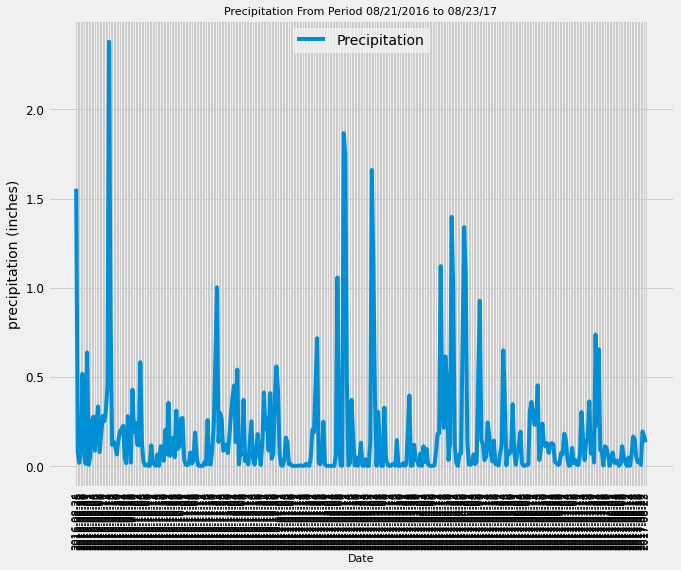

In [100]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
rain_data= session.query(func.min(measurement.date)).all()[0][0]
# Calculate the date 1 year ago from the last data point in the database
final_data = session.query(measurement.date,func.avg(measurement.prcp)).\
filter(measurement.date <"2017-08-24").\
filter(measurement.date > "2016-08-23").\
    order_by(measurement.date).\
    group_by(measurement.date).\
all()

df= pd.DataFrame(final_data,columns = ['date',"precipitation"])
#df.head()
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(df["date"],df["precipitation"])

ax.set_xlabel("Date", size= 11)
ax.set_ylabel("precipitation (inches)", size = 14)
ax.set_title("Precipitation From Period 08/21/2016 to 08/23/17", size= 11)
plt.xticks(rotation=90, size= 10)
plt.yticks(size= 12)
plt.legend(["Precipitation"],loc= 'upper center')
plt.show()


#>>>>>why is the code space sensitive?<<<<<
#>>>>>I cant get the dates to show!!!<<<<

In [101]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [102]:
# Design a query to show how many stations are available in this dataset?
session.query(station.station).distinct().count()

9

In [103]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
final_data = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

final_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [104]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
top_station = final_data[0][0]
temps = [func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)]
session.query(*temps).all()

[(53.0, 87.0, 73.09795396419437)]

In [105]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_temp_observ = engine.execute('''
                SELECT measurement.tobs, measurement.date
                FROM measurement
                WHERE measurement.date > '2016-08-21' AND measurement.station = 'USC00519281';''').fetchall()
         


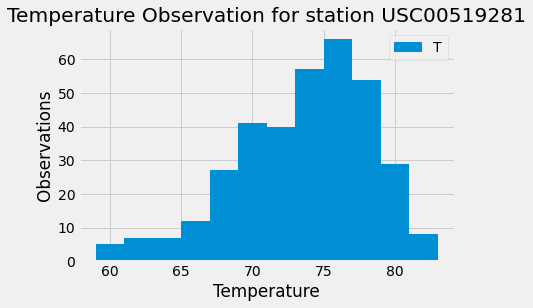

In [106]:
temp_observ_df = pd.DataFrame(most_temp_observ, columns = ['Temperature', 'Date'])
plt.hist(temp_observ_df['Temperature'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Observations')
plt.title('Temperature Observation for station USC00519281')
plt.legend('Tobs')
plt.show()

## Bonus Challenge Assignment

In [107]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
